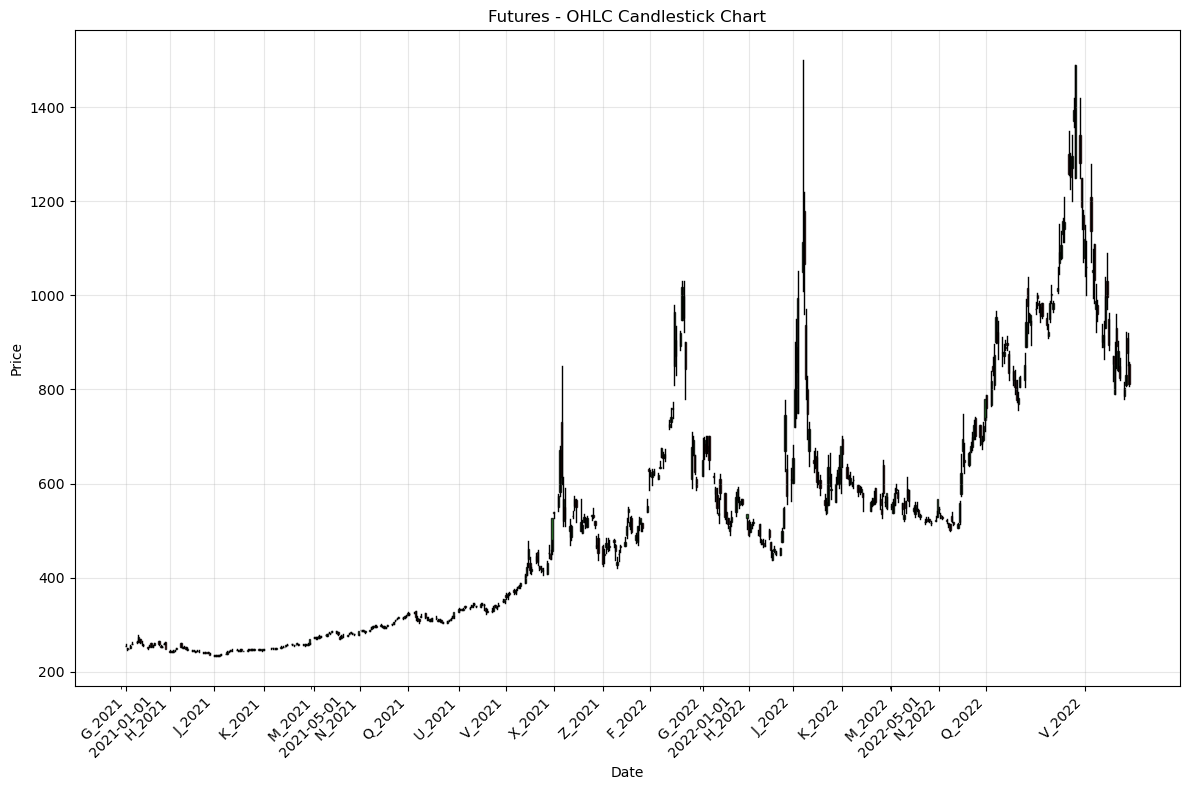


Data Summary Futures Stitched:
Date range: 2021-01-04 to 2022-09-29
Number of trading days: 450
Price range: $233.00 - $1500.00
Average daily volume: 2,787


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.patches import Rectangle
import numpy as np
from datetime import datetime

# Read the CSV file
df = pd.read_csv('futures_stitched.csv')

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Sort by date to ensure proper chronological order
df = df.sort_values('date').reset_index(drop=True)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Define colors for up and down days
up_color = 'green'
down_color = 'red'

# Compute width of candlestick based on min time delta
dates_num_all = mdates.date2num(df['date'])
deltas = np.diff(dates_num_all)
min_delta = float(deltas.min()) if len(deltas) > 0 else 1.0
width = 0.8 * min_delta

# Plot candlesticks
for i, row in df.iterrows():
    date = mdates.date2num(row['date'])
    open_price = row['open']
    high_price = row['high']
    low_price = row['low']
    close_price = row['close']

    # Determine color based on open vs close
    color = up_color if close_price >= open_price else down_color

    # Draw the high-low line (wick)
    ax.plot([date, date], [low_price, high_price], color='black', linewidth=1)

    # Draw the open-close rectangle (body)
    body_height = abs(close_price - open_price)
    body_bottom = min(open_price, close_price)

    rect = Rectangle((date - width / 2, body_bottom), width, body_height,
                     facecolor=color, edgecolor='black', alpha=0.8)
    ax.add_patch(rect)

# X-axis: show ticker label only when it changes
if 'ticker' in df.columns:
    # Create boolean mask where ticker changes (including first row)
    tickers = df['ticker'].astype(str)
    change_mask = tickers != tickers.shift(1)
    change_mask.iloc[0] = True

    # Positions (in date num space) and labels
    tick_positions = mdates.date2num(df.loc[change_mask, 'date'])
    # Show only the ticker (no date) on the x-axis labels
    tick_labels = df.loc[change_mask, 'ticker'].astype(str).tolist()

    # If there are too many change points, downsample labels to avoid overlap
    max_labels = 20
    if len(tick_positions) > max_labels:
        idx = np.linspace(0, len(tick_positions)-1, max_labels, dtype=int)
        tick_positions = tick_positions[idx]
        tick_labels = [tick_labels[i] for i in idx]

    ax.set_xticks(tick_positions)
    ax.set_xticklabels(tick_labels, rotation=45, ha='right')

    # Keep a light date formatter on the minor ticks so users can still see dates
    ax.xaxis.set_minor_locator(mdates.AutoDateLocator())
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.tick_params(axis='x', which='minor', rotation=45)
else:
    # Fallback: show dates as before
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    plt.xticks(rotation=45)

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Price')

ax.set_title(f'Futures - OHLC Candlestick Chart')

# Add grid for better readability
ax.grid(True, alpha=0.3)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the chart
plt.show()

# Optional: Print some basic statistics
print(f"\nData Summary Futures Stitched:")
print(f"Date range: {df['date'].min().strftime('%Y-%m-%d')} to {df['date'].max().strftime('%Y-%m-%d')}")
print(f"Number of trading days: {len(df)}")
print(f"Price range: ${df['low'].min():.2f} - ${df['high'].max():.2f}")
print(f"Average daily volume: {df['volume'].mean():,.0f}" if 'volume' in df.columns else "No 'volume' column found")
